In [1]:
__author__ = "@Tssp"
__date__   = "04/12/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 18
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
print(os.getcwd())
folder_path = "Simulations/ix4993_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [5]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_120rm8g2l60m8_68CM8g1L60M8_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix4993_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70556', '.70557', '.70558', '.70559', '.70561', '.70562', '.70563', '.70564', '.70566', '.70567', '.70568', '.70569', '.70571', '.70572', '.70573', '.70574', '.70576', '.70577', '.70578', '.70579', '.70581', '.70582', '.70583', '.70584', '.70586', '.70587', '.70588', '.70589', '.70591', '.70592', '.70593', '.70594', '.70596', '.70597', '.70598', '.70599', '.70601', '.70602', '.70603', '.70604', '.70606', '.70607', '.70608', '.70609', '.70611', '.70612', '.70613', '.70614', '.70616', '.70617', '.70618', '.70619', '.70621', '.70622', '.70623', '.70624', '.70626', '.70627', '.70628', '.70629', '.70631', '.70632', '.70633', '.70634', '.70636', '.70637', '.70638', '.70639', '.70641', '.70642', '.70643', '.70644', '.70646', '.70647', '.70648', '.70649', '.70651', '.70652', '.70653', '.70654', '.70656', '.70657', '.70658', '.70659', '.70661', '.70662', '.70663', '.70664', '.70666', '.70667', '.70668', '.70669', '.70671', '.70672', '.70673', '.70

In [6]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [7]:
dic = transpose_energies(Data)

In [8]:
#dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

In [12]:
least_bound_pos = 1000

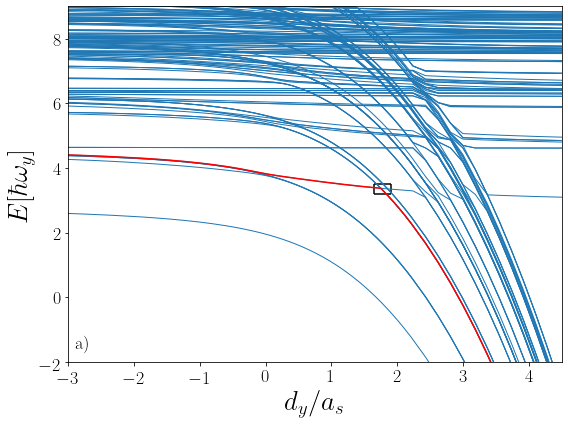

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 160):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0', lw=1)
ax.plot(x, dic['nivel_1004']/wy, 'r')
ax.hlines(3.2, 1.65, 1.9, 'k')
ax.hlines(3.5, 1.65, 1.9, 'k')
ax.vlines(1.65, 3.2, 3.5, 'k')
ax.vlines(1.9, 3.2, 3.5, 'k')
ax.text(-2.9, -1.6, 'a)', fontsize=18)
ax.set_ylim(-2, 9)
ax.set_xlim(-3, 4.5)
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_solid.png', dpi=200)
plt.show()

#### Crosses

In [15]:
%matplotlib inline

## Resonance x=0

1001
1002
1003


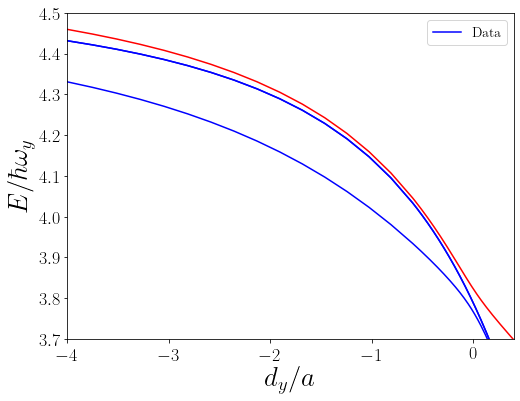

In [16]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+1, least_bound_pos + 4):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1004']/wy, 'r', label='trap')
ax2.set_ylim(3.7, 4.5)
ax2.set_xlim(-4, 0.4)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [17]:
print(f'x={x[170]}, delta=0{delta[170]}\nx={x[263]}, delta=0{delta[263]}')

x=0.6950184766427349, delta=0.71180
x=-0.27875619929018153, delta=0.71650


## Resonance x>1

In [18]:
print(delta[78], delta[84], delta[90], delta[72])

.70720 .70750 .70780 .70690


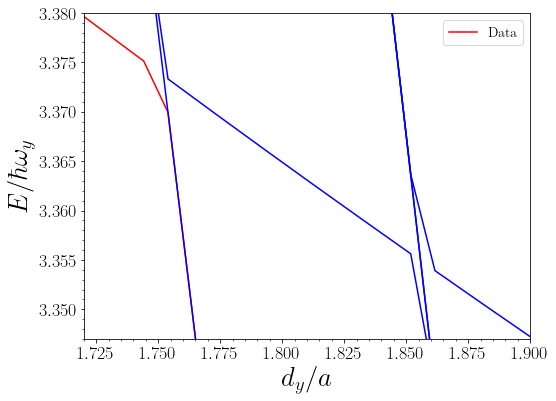

In [19]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
#for i in range(least_bound_pos+4, least_bound_pos + 11):
#    print(i)
#    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1004']/wy, 'r')
ax2.plot(x, dic['nivel_1005']/wy, 'b')
ax2.plot(x, dic['nivel_1007']/wy, 'b')
ax2.plot(x, dic['nivel_1008']/wy, 'b')
ax2.plot(x, dic['nivel_1009']/wy, 'b')
ax2.plot(x, dic['nivel_1010']/wy, 'b')
ax2.set_ylim(3.347, 3.380)
ax2.set_xlim(1.72, 1.9)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [20]:
print(f'x={x[10]}, delta=0{delta[10]}\nx={x[55]}, delta=0{delta[55]}\nx={x[30]}, delta=0{delta[30]}\nx={x[15]}, delta=0{delta[15]}')

x=3.000307449305521, delta=0.70000
x=1.8420397056786797, delta=0.70605
x=2.0852993031919804, delta=0.70480
x=2.2302489760189914, delta=0.70405


9.462564708309891e-14


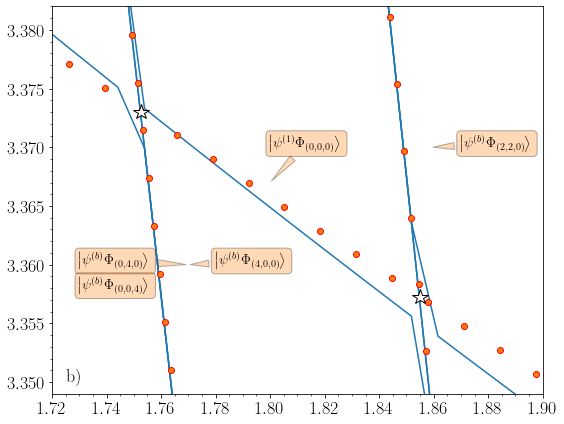

In [21]:
fig3, ax3 = plt.subplots(figsize=(8,6))
# nivel 1004:
f1004 = trap_fit(dic, x, x_lims=(1.72, 1.9), y_lims=(3.349, 3.382) ,levels=(1004, 1010), wy=wy)/wy
x1004 = np.linspace(1.7, 1.95, num=20)
ax3.plot(x, dic['nivel_1004']/wy, 'C0', label='Adiabatic', zorder=1)
ax3.scatter(x1004, np.polyval(f1004, x1004), edgecolor='r', facecolor='C1', label='Diabetic', zorder=2)

# nivel 1005:
ax3.plot(x, dic['nivel_1005']/wy, 'C0', zorder=1)

# nivel 1006:
ax3.plot(x, dic['nivel_1006']/wy, 'C0', zorder=1)

# nivel 1007:
ax3.plot(x, dic['nivel_1007']/wy, 'C0', zorder=1)
f1007 = np.polyfit(x[(x < 1.74) & (x > 1.7)], np.array(dic['nivel_1007'])[(x < 1.74) & (x > 1.7)]/wy, deg=1)
x1007 = np.linspace(1.6, 1.8, num=100)
ax3.scatter(x1007, np.polyval(f1007, x1007), edgecolor='r', facecolor='C1', zorder=2)

# nivel 1008:
ax3.plot(x, dic['nivel_1008']/wy, 'C0', zorder=1)

# nivel 1009:
ax3.plot(x, dic['nivel_1009']/wy, 'C0', zorder=1)

# nivel 1010:
f1010 = np.polyfit(x[(x < 1.85) & (x > 1.8)], np.array(dic['nivel_1010'])[(x < 1.85) & (x > 1.8)]/wy, deg=1)
x1010 = np.linspace(1.82, 1.95, num=50)
ax3.plot(x, dic['nivel_1010']/wy, 'C0', zorder=1)
ax3.scatter(x1010, np.polyval(f1010, x1010), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(f1004, f1007), np.polyval(f1004, cross_points(f1004, f1007)), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(f1004, f1010), np.polyval(f1004, cross_points(f1004, f1010)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.80, 3.367), xytext=(1.80, 3.37), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.770, 3.356), xytext=(1.73, 3.3579), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(1.77, 3.36), xytext=(1.78, 3.36), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.77, 3.36), xytext=(1.73, 3.36), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.859, 3.37), xytext=(1.87, 3.37), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))


ax3.set_xlabel('')
ax3.set_ylabel('')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.text(1.725, 3.35, 'b)', fontsize=18)
ax3.set_ylim(3.349, 3.382)
ax3.set_xlim(1.72, 1.9)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
plt.tight_layout()
#fig3.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Interpolation_v2.png', bbox_inches="tight", dpi=200)

In [55]:
import pickle

9.462564708309891e-14


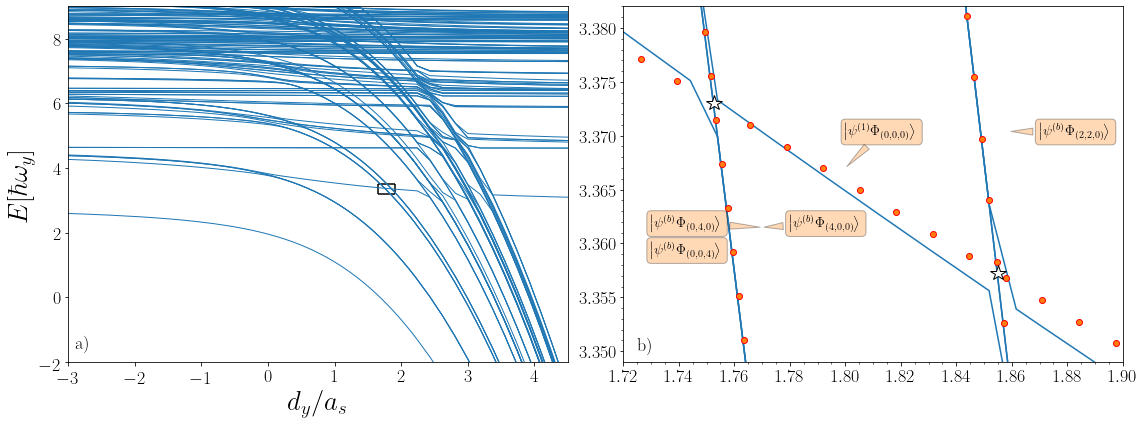

In [22]:
fig4, ax4 = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for i in range(least_bound_pos, least_bound_pos + 160):
    ax4[0].plot(x, dic['nivel_{}'.format(i)]/wy, 'C0', lw=1)
ax4[0].hlines(3.2, 1.65, 1.9, 'k')
ax4[0].hlines(3.5, 1.65, 1.9, 'k')
ax4[0].vlines(1.65, 3.2, 3.5, 'k')
ax4[0].vlines(1.9, 3.2, 3.5, 'k')
ax4[0].text(-2.9, -1.6, 'a)', fontsize=18)
ax4[0].set_ylim(-2, 9)
ax4[0].set_xlim(-3, 4.5)
ax4[0].set_xlabel('$d_{y}/a_s$')
ax4[0].set_ylabel('$E[\hbar \omega_{y}]$')

####################################################################################################

f1004 = trap_fit(dic, x, x_lims=(1.72, 1.9), y_lims=(3.349, 3.382) ,levels=(1004, 1010), wy=wy)/wy
x1004 = np.linspace(1.7, 1.95, num=20)
ax4[1].plot(x, dic['nivel_1004']/wy, 'C0', label='Adiabatic', zorder=1)
ax4[1].scatter(x1004, np.polyval(f1004, x1004), edgecolor='r', facecolor='C1', label='Diabetic', zorder=2)

# nivel 1005:
ax4[1].plot(x, dic['nivel_1005']/wy, 'C0', zorder=1)

# nivel 1006:
ax4[1].plot(x, dic['nivel_1006']/wy, 'C0', zorder=1)

# nivel 1007:
ax4[1].plot(x, dic['nivel_1007']/wy, 'C0', zorder=1)
f1007 = np.polyfit(x[(x < 1.74) & (x > 1.7)], np.array(dic['nivel_1007'])[(x < 1.74) & (x > 1.7)]/wy, deg=1)
x1007 = np.linspace(1.6, 1.8, num=100)
ax4[1].scatter(x1007, np.polyval(f1007, x1007), edgecolor='r', facecolor='C1', zorder=2)

# nivel 1008:
ax4[1].plot(x, dic['nivel_1008']/wy, 'C0', zorder=1)

# nivel 1009:
ax4[1].plot(x, dic['nivel_1009']/wy, 'C0', zorder=1)

# nivel 1010:
f1010 = np.polyfit(x[(x < 1.85) & (x > 1.8)], np.array(dic['nivel_1010'])[(x < 1.85) & (x > 1.8)]/wy, deg=1)
x1010 = np.linspace(1.82, 1.95, num=50)
ax4[1].plot(x, dic['nivel_1010']/wy, 'C0', zorder=1)
ax4[1].scatter(x1010, np.polyval(f1010, x1010), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax4[1].plot(cross_points(f1004, f1007), np.polyval(f1004, cross_points(f1004, f1007)), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax4[1].plot(cross_points(f1004, f1010), np.polyval(f1004, cross_points(f1004, f1010)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
ax4[1].annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.80, 3.367), xytext=(1.80, 3.37), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax4[1].annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.770, 3.356), xytext=(1.73, 3.359), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'))

ax4[1].annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(1.77, 3.3615), xytext=(1.78, 3.3615), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax4[1].annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.77, 3.3615), xytext=(1.73, 3.3615), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
ax4[1].annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.859, 3.3704), xytext=(1.87, 3.37), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))


ax4[1].set_xlabel('')
ax4[1].set_ylabel('')
ax4[1].text(1.725, 3.35, 'b)', fontsize=18)
ax4[1].set_ylim(3.349, 3.382)
ax4[1].set_xlim(1.72, 1.9)
ax4[1].xaxis.set_minor_locator(AutoMinorLocator())
ax4[1].yaxis.set_minor_locator(AutoMinorLocator())
plt.tight_layout()

#fig4.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Spectrum_Zoom.png', bbox_inches="tight", dpi=200)

In [19]:
print(f'''Crosses between (x, E):
* 1004-1007: ({cross_points(f1004, f1007)}, {np.polyval(f1004, cross_points(f1004, f1007))})
* 1004-1010: ({cross_points(f1004, f1010)}, {np.polyval(f1004, cross_points(f1004, f1010))})''')

Crosses between (x, E):
* 1004-1007: (1.7636711369978066, 3.3735016736501566)
* 1004-1010: (1.8670744761242541, 3.354815535571634)


In [20]:
print(f'''ICIR: asc/dy:
* 1004-1007: {1/cross_points(f1004, f1007)}
* 1004-1010: {1/cross_points(f1004, f1010)}''')

ICIR: asc/dy:
* 1004-1007: 0.5669991298390475
* 1004-1010: 0.5355972741247252


In [26]:
%matplotlib

Using matplotlib backend: MacOSX
